<a href="https://colab.research.google.com/github/lonen8188/PythonAI/blob/7-2.Deep_Neural_Network/hg_07_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 인공 신경망에 층을 추가하여 데이터셋을 분류하면 딥! -> 심층 신경망

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [6]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 케라스 API에서 패션 MNIST 데이터 셋을 불러옴
# 훈련세트와 테스트 셋을 만듬

In [7]:
from sklearn.model_selection import train_test_split

# 이미지의 필셀 값이 0~155 범위에서 0~1사이로 변환
train_scaled = train_input / 255.0
# 28x28 크기의 2차원 배열을 만들어 784 크기의 1차원 배열로 펼침
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
# 20%의 훈련세트와 검증세트로 분할

# 인공 신경망 모델에 2개의 레이어를 추가해 보겠다
# 전에만든 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집 층이 추가된 것 -> 은닉층(hidden layer)
# 은닉층에는 주황색원 으로 활성화 함수가 표시되어 있다.
# 활성화 함수는 신경망 층의 선형 방정식 계산 값에 적용하는 함수이다.
# 출력층에 적용하는 활성화 함수는 종류가 제한되어 있음. 이진분류(시그모이드함수), 다중분류(소프트맥스함수) -> 분류를 위한
# 은닉층은 활성화 함수가 자유롭다 (대표적 : 시그모이드함수, 볼 렐루 함수....)
# a*4+2*b -> b*3-5=c 라고 했을 때  b가 하는 일은 임시용 -> a*12+1=c

# 신경망도 마찬가지로 은닉층에서 선형적인 산술 계산만 수행다면 수행 역할일 없는 셈
# 선형 계산을 적당하게 비선형적으로 비틀어 줘야 함, 그래야 다음 층의 계산과 단순희 합쳐지지않고 나름의 역할을 할 수 있다.
# a*4+2*b -> log(b)=k -> k*3-5=c 라고 했을 때 log(b)=k 가 하는 일은?

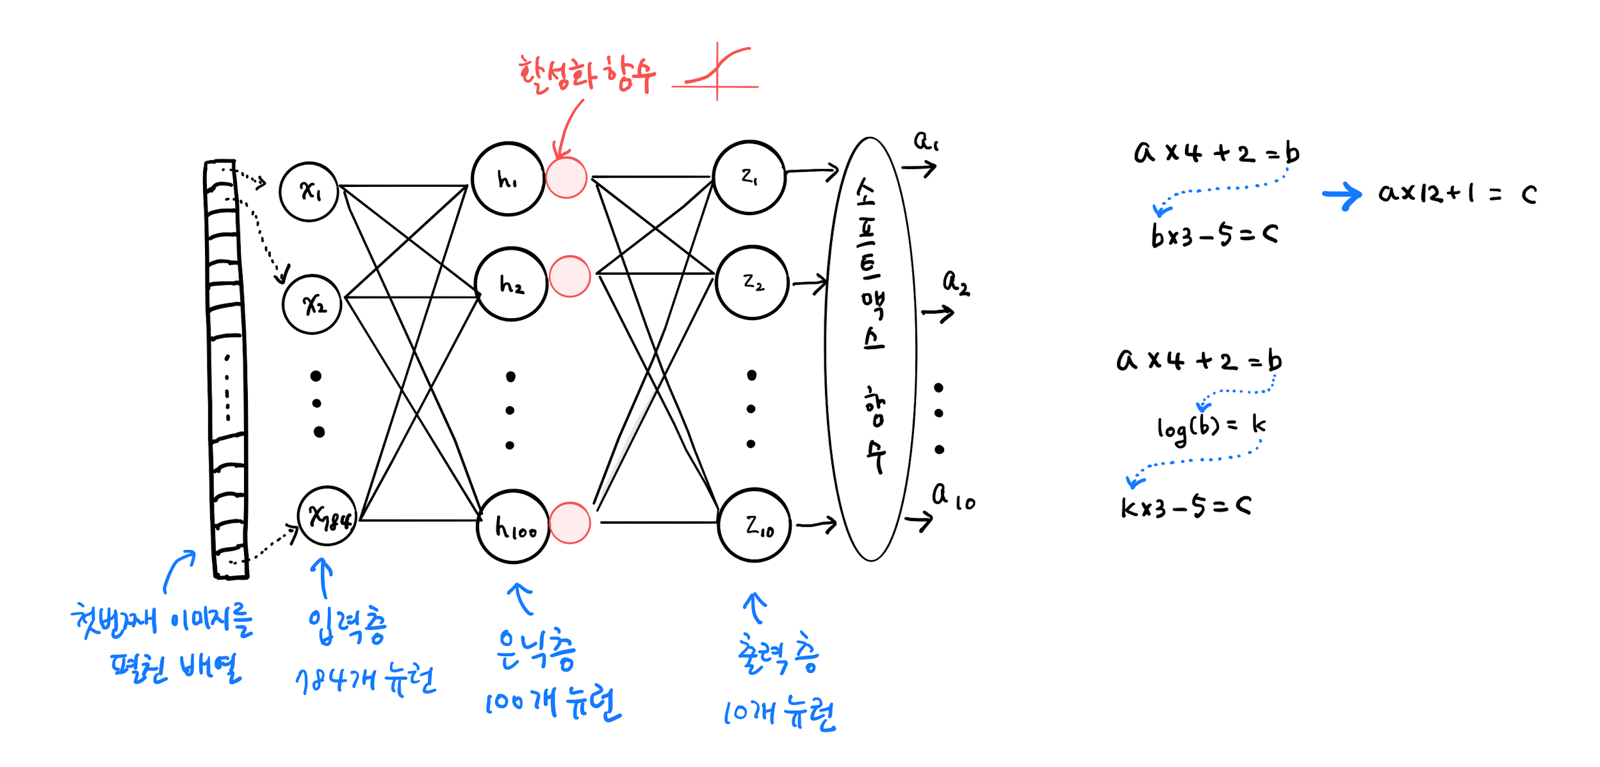

In [8]:
# 시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 출력층을 케라스 Dense 클래스로 만들어 보자.
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) #input_shape=(784,) 입력의 크기 필수
# dense1 이 은닉층이고 100개의 뉴런을 가진 밀집층, 활성화 함수를 시그모이드로 설정
# 몇개의 뉴런이 필요할 지는 경험적으로 기입
# 제약사항으로는 적어도 출력층의 뉴런보다는 많게 만들어야 한다. (클래스 10개에 대한 확률을 예측해야 하는데 은닉층의 뉴런이 10개 이하면 안됨)

dense2 = keras.layers.Dense(10, activation='softmax')
# dense2은 출력층으로 설정 (10개의 클래스를 분류하므로 10개의 뉴런을 둠), 활성화 함수로 소프트 맥스 함수로 지정

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 심층 신경망 만들기
model = keras.Sequential([dense1, dense2])
# 위에서 만든 dense1, dense2를 Sequential 클래스에 추가하여 심층(deep) 신경망을 만듬
# dense1, dense2를 리스트로 만들어 전달함
# 주의 : 뒤에가 출력층임으로 dense2를 설정
# 인공 신경망의 강력한 성능은 층을 추가하여 입력 데이터에 대해 연속적인 학습을 진행하는 능력 -> 2개이상 층을 추가 가능

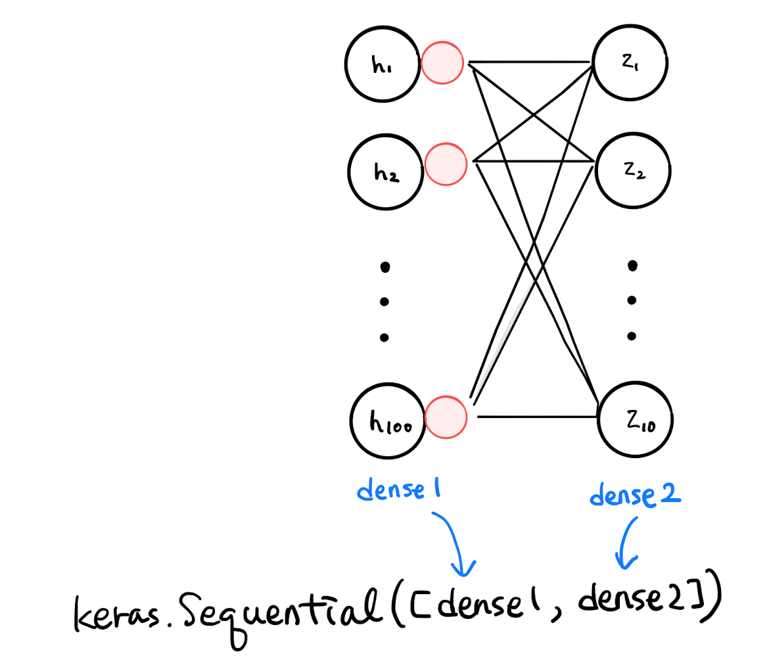

In [12]:
model.summary() # 층에 대한 유용한 정보가 나옴
# 맨 첫줄에 모델의 이름
# 그 다음 이 모델이 들어 있는 층이 순서대로 나옴
# 맨 처음 추가한 은닉층에서 출력층의 순서대로 나옴
# 층이름(클래스), 출력크기, 모델 파라미터 개수
# 층이름을 지정하지 않으면 케라스가 자동으로 Dense라고 이름을 붙임
# 출력크기 (None(샘플의 개수: 아직 정의되지 않음), 100)
#                -> 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한번에 모두 사용하지 않고 잘게 나누어 여러번 걸쳐 경사 하강법 단계를 수행(매니배치 경사 하강법)
# 케라스의 기본 미니배치 크기는 32개 임, 이 값은 fit() 메서드에서 batch_szie 매개변수로 변경 가능
# 따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정이 최선

# 신경망 층에서 입력되거나 출력되는 배열의 첫 번째 차원을 배치 자원이라고 부름

# 출력크기 (None, 100 -> 은닉층의 뉴런 개수를 100개임으로 100개의 출력이 나옴) -> 샘플마나 784개의 필셀 값이 은닉층을 통과하면서 100개의 특성으로 압축
# 마지막으로 파라미터 개수가 출력됨 784 * 100 + 100 = 78500

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 두번째 층의 출력 크기 (None, 10) -> 뉴런 개수가 10개임
# 파라미터는 100 * 10 + 10 = 1010개

# 맨 아래 있는 Non-trainable params: 0 (0.00 B) 는 훈련되지 않는 파라미터(간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층의 파라미터)

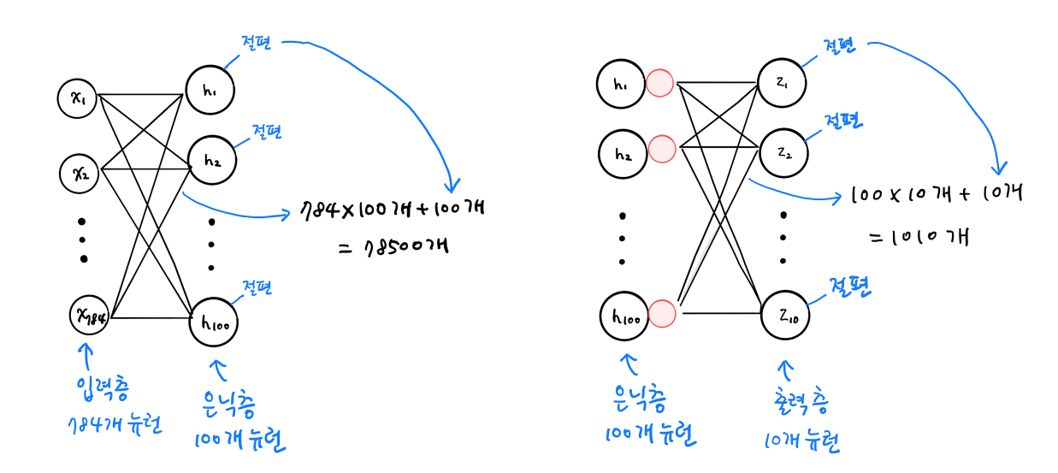

In [13]:
# Sequential클래스에 층을 추가하는 다른 방법
# 앞에 2개의 Dense는 따로 저장하여 쓸일이 없기 때문에 아래 코드처럼 Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만드는 경우가 많다.

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'), # name='hidden' 레이어 이름 정의(영어만!)
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델') # 모델의 이름

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
 # 층 추가시 가장 편한 방법은 .add()를 사용한다.
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 모델 훈련 시작!
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7525 - loss: 0.7720
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8463 - loss: 0.4270
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8604 - loss: 0.3857
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8696 - loss: 0.3600
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8759 - loss: 0.3410


In [18]:
# 훈련결과를 보면 훈련 세트에 대한 성능이 추가된 층이 성능을 향상시켰다는 것을 잘 알 수 있다.
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8733 - loss: 0.3530


[0.356849730014801, 0.8694999814033508]

In [ ]:
# 초창기 인공 신경망의 은닉층에서 많이 사용된 활성화 함수는 시그모이드 함수였지만 단점이 오른쪽, 왼쪽 끝으로 갈수록 그래프가 누워 올바른 출력을 만드는데 신속하게 대응하지 못함.
# 특히 층이 많은 심층 신경망일 수록 그 효과가 누적되어 학습을 더 어렵게 만듬.
# 개선을 위해서 다른 종류의 활성 함수가 제안 되었는데 바로 렐루(ReLU) 함수임
# 렐루 함수는 입력이 양수 일 경우 마치 활성화 함수가 없는 것 처럼 그냥 입력을 통과시키고 음수일 경우0 으로 만듬.
# 렐루 함수는 max(0, z)와 같이 씀 -> z가 0보다 크면 z를 출력하고 0보자 작으면 0을 출력
# 렐수 함수는 특히 이미지 처리에 좋은 성능을 낸다고 함
# 은닉 층에 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에 카라스에서 제공하는 편리한 층 하나가 있다. -> Flatten
# Flatten(플래튼) 클래스는 배치 자원을 제외하고 나머지 입력 창원을 모두 일렬도 펼치는 역할 만 한다.(가중치, 절편 없음)
# 절편 : 직선이 x축과 만나는 점의 x좌표(x절편) 및 y축과 만나는 점의 y좌표(y절편)를 통틀어 이르는 말이다.
# 하지만 플래튼 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라고 부름

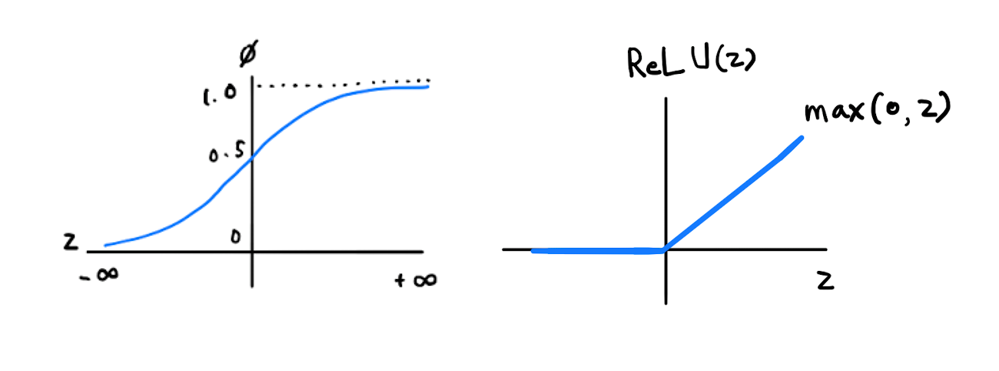

In [21]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) # 입력층 바로 뒤에 플래튼 층 추가
# 플래튼 클래스에 포함된 파라미터는 0개로 케라스의 플래튼 층을 신경만 모델에 추가하면 입력값의 차원을 짐작할 수 있는 것이 장점이 됨
# (None, 784) -> 784개의 입력이 첫 번째 은닉층에 전달됨을 알 수 있다.
model.add(keras.layers.Dense(100, activation='relu')) # 렐루층
model.add(keras.layers.Dense(10, activation='softmax')) #소프트 맥스층
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# 훈련 데이터를 준비해서 모델 훈련 시작
# reshape() 메서드 제외함.
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [23]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5) # 전과 비교해보면 조금 향상됨

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7646 - loss: 0.6757
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8509 - loss: 0.4070
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8676 - loss: 0.3607
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8799 - loss: 0.3353
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8869 - loss: 0.3187


In [24]:
model.evaluate(val_scaled, val_target) # 전과 비교해보면 조금 향상됨

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8661 - loss: 0.3883


[0.38628941774368286, 0.8634999990463257]

In [26]:
# 하이퍼파라미터는 모델이 학습하지 않아 사람이 지정해 주어야 하는 파라미터
# 신경망에는 특히 하이퍼파라미터가 많다.
# 전에는 하나의 은닉층을 추가하였지만 여러 개의 은닉층을 추가할 수도 있다.
# 추가할 은닉층의 개수는 모델이 학습하는 것이 아니라 우리가 지정해 주어야할 하이퍼파라미터임.
# 은닉 층의 뉴런 개수도 우리가 지정하는 것이 하이퍼 파라미터임. (활성화 함수, 층의 종류 포함)
# 케라스는 기본적으로 미니배치 경사 하강법을 사용하며 미니배치 개수는 32개라고 했다. 이를 조정하는 batch_size로 하이퍼 파라미터
# fit() 메서드의 epochs(에포크 : 중요한 사건시점) 매개변수도 하이퍼파라미터임. -> 반복한 횟수에 따라 다른 모델이 만들어짐.

# 마지막으로 compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop(Root Mean Sqaure Propagation의 약자로, 알엠에스프롭(R.M.S.Prop)이라고 읽습니다.)
# 케라스는 다양한 종류의 경사 하강법을 제공하는데 이를 옵티마이저(optimizer:최적화)라고 부름 -> 학습률 또한 조정할 하이퍼파라미터임.
# https://heytech.tistory.com/384

# 처음부터 모델을 구성하고 각종 하이퍼파라미터의 최적값을 찾는 것은 어려운 작업임.

# 옵티마이저 테스트1 -> 확률적 경사 하강법 SGD (1개의 샘플을 뽑아 훈련하지 않고 앞서 언급한 것 처럼 기본적인 미니 배치를 사용)
# optimizer='sgd' 자동으로 클래스를 객체로 만들고 시작함  sgd = keras.optimizers.SGD() 생략 가능
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
sgd = keras.optimizers.SGD(learning_rate=0.1) # learning_rate=0.1원하는 학습율 기록(기본값 0.01)

# 아래 그림처럼 다양한 최적화 기법이 존재 한다.
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
# 모멘텀(기본0 : 그레이디언트 가속도 0.9이상 사용), 네스테로프 모멘텀(네스테로프 모멘텀 최적화=가속경사)
#  네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다. -> 기본 확률적 경사 하강법보다 더 나은 성능을 제공

# 모델이 최적점에 가까이 갈수록 학습률을 낮출수도 있다. -> 안정적으로 최적점에 수렴 (적응적 학습률 : adaptive learning rate)
# 학습률 매개변수를 튜닝하는 수고를 줄여줌

# 적응적 학습률 : adaptive learning rate을 사용하는 대표적인 최적화기법음 Adagrad, RMSprop가 있다.
# complie()메서드의 optimizer=adagrad, optimizer=rmsprop
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

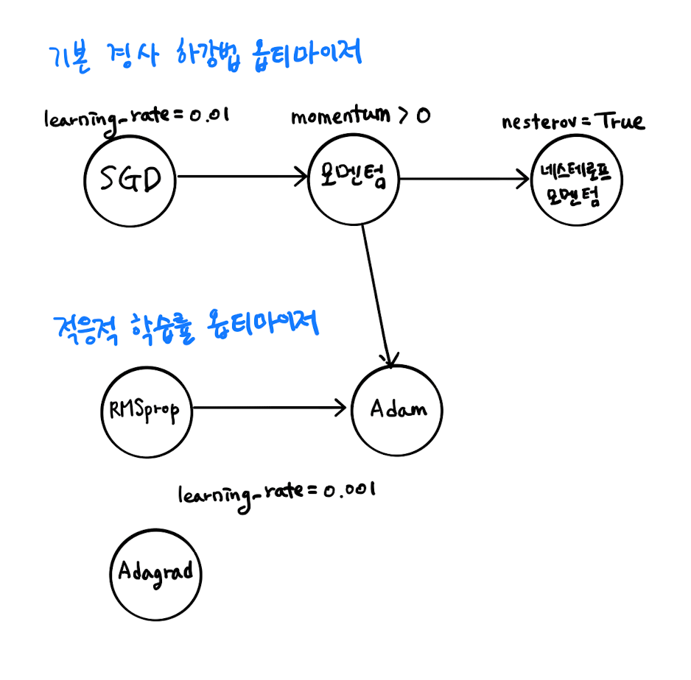

In [33]:
# Adam : 모멘텀 최적화와 RMSprop의 장점을 접목한 것
# 적응적 학습하는 위 3개의 클래스는 leaning_rate 매개변수의 기본값으로 모두 0.001을 사용한다.

# 모델을 생성하고 adam 최적화를 진행하자.

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7722 - loss: 0.6628
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8539 - loss: 0.4071
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8695 - loss: 0.3576
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8808 - loss: 0.3273
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8886 - loss: 0.3032


In [ ]:
# <keras.src.callbacks.history.History at 0x7b1adc7f9e70> -> fit()의 History클래스객체의 결과를 반환함
# 노트북의 코드 셀은 pring()를 사용하지 않아도 마지막 라인의 실행결과를 자동으로 출력함
# History 객체는 훈련과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있음 (그래프로 그릴수 있음)

In [34]:
model.evaluate(val_scaled, val_target) # 검증 성능 확인

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8771 - loss: 0.3464


[0.347247838973999, 0.874833345413208]

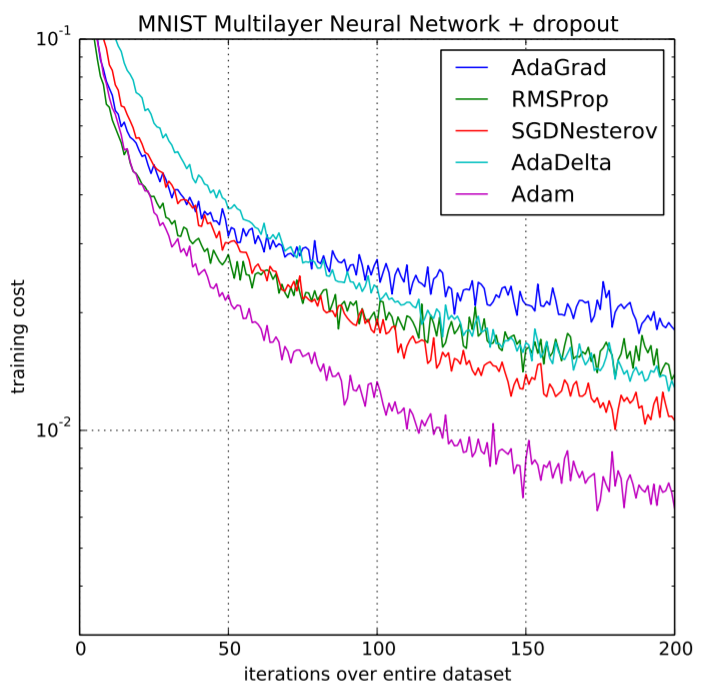